# Problem Statement:
# "Can Key Fantasy Football Performance Metrics Predict NFL Team Success? Analyzing the Impact of Yards Gained from Scrimmage in Determining Team Win-Loss Records"


In [2]:
# In the ever-evolving world of sports analytics, fantasy football has emerged as a powerful tool for fans and analysts alike to engage with the NFL on a deeper level. Fantasy football scores are built on a foundation of real-world player statistics, reflecting key performance metrics such as yards gained, touchdowns scored, and turnovers. These metrics offer a direct glimpse into a player's contribution on the field and, by extension, their potential impact on their team's success.  


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
# Load the dataset
QB_Stats = pd.read_csv(r"/Users/bkf/Dropbox/Mac/Desktop/DS Bootcamp Files/Capstone Project/NFL Data/Game_Logs_Quarterback.csv")  
RB_Stats = pd.read_csv(r"/Users/bkf/Dropbox/Mac/Desktop/DS Bootcamp Files/Capstone Project/NFL Data/Game_Logs_Runningback.csv")  
WRTE_Stats = pd.read_csv(r"/Users/bkf/Dropbox/Mac/Desktop/DS Bootcamp Files/Capstone Project/NFL Data/Game_Logs_Wide_Receiver_and_Tight_End.csv")  

# Drop NaN values from each dataset individually
QB_Stats.dropna(subset=['Passing Yards', 'Rushing Yards', 'Outcome'], inplace=True)
RB_Stats.dropna(subset=['Rushing Yards', 'Receiving Yards', 'Outcome'], inplace=True)
WRTE_Stats.dropna(subset=['Rushing Yards', 'Receiving Yards', 'Outcome'], inplace=True)

# Combine the cleaned datasets
df_combined = pd.concat([QB_Stats, RB_Stats, WRTE_Stats], axis=0)
df_combined.reset_index(drop=True, inplace=True)

# Keep only necessary columns (if player started or not)
# Filter the DataFrame to keep only rows where "Games Started" is 1
df_combined = df_combined[df_combined['Games Played'] == 1]

# Inspect the first few rows of the cleaned and combined dataset
print(df_combined.head(10))
print(df_combined.info())
print(df_combined.describe())

                 Player Id              Name Position  Year          Season  \
1   jaredzabransky/2495791  Zabransky, Jared      NaN  2007       Preseason   
3   jaredzabransky/2495791  Zabransky, Jared      NaN  2007       Preseason   
10      billdemory/2512778      Demory, Bill      NaN  1974  Regular Season   
19      billdemory/2512778      Demory, Bill      NaN  1973  Regular Season   
20      billdemory/2512778      Demory, Bill      NaN  1973  Regular Season   
21      billdemory/2512778      Demory, Bill      NaN  1973  Regular Season   
22      billdemory/2512778      Demory, Bill      NaN  1973  Regular Season   
24      billdemory/2512778      Demory, Bill      NaN  1973  Regular Season   
25      billdemory/2512778      Demory, Bill      NaN  1973  Regular Season   
30       tomsavage/2543640       Savage, Tom       QB  2016       Preseason   

    Week Game Date Home or Away Opponent Outcome  ... Yards Per Carry  \
1      2     08/18         Away      ARI       W  ...    

In [5]:
# Define columns that should be converted to numeric
numeric_columns = ['Passing Yards', 'Rushing Yards', 'Receiving Yards']

# Convert only the numeric columns to numeric, skipping 'Outcome'
df_combined[numeric_columns] = df_combined[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Ensure 'Outcome' remains as a string
df_combined['Outcome'] = df_combined['Outcome'].astype(str)

print(df_combined.head())


                 Player Id              Name Position  Year          Season  \
1   jaredzabransky/2495791  Zabransky, Jared      NaN  2007       Preseason   
3   jaredzabransky/2495791  Zabransky, Jared      NaN  2007       Preseason   
10      billdemory/2512778      Demory, Bill      NaN  1974  Regular Season   
19      billdemory/2512778      Demory, Bill      NaN  1973  Regular Season   
20      billdemory/2512778      Demory, Bill      NaN  1973  Regular Season   

    Week Game Date Home or Away Opponent Outcome  ... Yards Per Carry  \
1      2     08/18         Away      ARI       W  ...              --   
3      4     08/30         Away       TB       L  ...             8.5   
10     7     10/27         Home       LA       L  ...              --   
19     4     10/07         Away      MIA       L  ...              --   
20     5     10/14         Away       NE       W  ...             0.0   

    Rushing TDs Fumbles Fumbles Lost Longest Rushing Run Receptions  \
1            --

In [6]:
# Convert 'W' to 1 and 'L' to 0
df_combined['Outcome'] = df_combined['Outcome'].map({'W': 1, 'L': 0})

# Verify the conversion
print(df_combined['Outcome'].head())


1     1.0
3     0.0
10    0.0
19    0.0
20    1.0
Name: Outcome, dtype: float64


In [7]:
# Create a column for Wins (where 'Outcome' is 1.0)
df_combined['wins'] = df_combined['Outcome'].apply(lambda x: 1 if x == 1.0 else 0)

# Create a column for Losses (where 'Outcome' is 0.0)
df_combined['losses'] = df_combined['Outcome'].apply(lambda x: 1 if x == 0.0 else 0)

# Calculate Win-Loss Pct
df_combined['Win-Loss Pct'] = df_combined['wins'] / (df_combined['wins'] + df_combined['losses'])

# Inspect the result
print(df_combined[['Outcome', 'wins', 'losses', 'Win-Loss Pct']].head())


    Outcome  wins  losses  Win-Loss Pct
1       1.0     1       0           1.0
3       0.0     0       1           0.0
10      0.0     0       1           0.0
19      0.0     0       1           0.0
20      1.0     1       0           1.0


In [8]:
# Keep only necessary columns
df_combined = df_combined[['Games Played', 'Passing Yards', 'Rushing Yards', 'Receiving Yards', 'Outcome', 'wins', 'losses', 'Win-Loss Pct']]

# Display the cleaned dataset
print(df_combined.head())


    Games Played  Passing Yards  Rushing Yards  Receiving Yards  Outcome  \
1              1           19.0            NaN              NaN      1.0   
3              1          117.0           17.0              NaN      0.0   
10             1            NaN            NaN              NaN      0.0   
19             1           14.0            NaN              NaN      0.0   
20             1           11.0            0.0              NaN      1.0   

    wins  losses  Win-Loss Pct  
1      1       0           1.0  
3      0       1           0.0  
10     0       1           0.0  
19     0       1           0.0  
20     1       0           1.0  


In [9]:
######Performing Initial Exploratory Data Analysis

In [10]:
# Filter data where Passing Yards > 300
high_passing = df_combined[df_combined['Passing Yards'] > 300]

# Filter data where Passing Yards <= 300
low_passing = df_combined[df_combined['Passing Yards'] <= 300]

# Calculate win rate for Passing Yards > 300
high_passing_win_rate = high_passing['Outcome'].mean() * 100  # Assuming Outcome is 1 for win, 0 for loss

# Calculate win rate for Passing Yards <= 300
low_passing_win_rate = low_passing['Outcome'].mean() * 100  # Assuming Outcome is 1 for win, 0 for loss

# Display the results
print(f"Win rate for games with >300 Passing Yards: {high_passing_win_rate:.2f}%")
print(f"Win rate for games with <=300 Passing Yards: {low_passing_win_rate:.2f}%")


Win rate for games with >300 Passing Yards: 51.18%
Win rate for games with <=300 Passing Yards: 48.09%


In [11]:
# Filter data where Rushing Yards > 120
high_rushing = df_combined[df_combined['Rushing Yards'] > 120]

# Filter data where Rushing Yards <= 120
low_rushing = df_combined[df_combined['Rushing Yards'] <= 1210]

# Calculate win rate for Rushing Yards > 120
high_rushing_win_rate = high_rushing['Outcome'].mean() * 100  # Assuming Outcome is 1 for win, 0 for loss

# Calculate win rate for Rushing Yards <= 120
low_rushing_win_rate = low_rushing['Outcome'].mean() * 100  # Assuming Outcome is 1 for win, 0 for loss

# Display the results
print(f"Win rate for games with >120 Rushing Yards: {high_rushing_win_rate:.2f}%")
print(f"Win rate for games with <=120 Rushing Yards: {low_rushing_win_rate:.2f}%")


Win rate for games with >120 Rushing Yards: 79.08%
Win rate for games with <=120 Rushing Yards: 53.05%


In [12]:
# Filter data where Receiving Yards > 150
high_receiving = df_combined[df_combined['Receiving Yards'] > 150]

# Filter data where Receiving Yards <= 150
low_receiving = df_combined[df_combined['Receiving Yards'] <= 150]

# Calculate win rate for Receiving Yards > 150
high_receiving_win_rate = high_receiving['Outcome'].mean() * 100  # Assuming Outcome is 1 for win, 0 for loss

# Calculate win rate for Receiving Yards <= 150
low_receiving_win_rate = low_receiving['Outcome'].mean() * 100  # Assuming Outcome is 1 for win, 0 for loss

# Display the results
print(f"Win rate for games with >150 Receiving Yards: {high_receiving_win_rate:.2f}%")
print(f"Win rate for games with <=150 Receiving Yards: {low_receiving_win_rate:.2f}%")


Win rate for games with >150 Receiving Yards: 57.14%
Win rate for games with <=150 Receiving Yards: 49.41%


In [13]:
# Summary statistics for key metrics
summary_stats = df_combined.describe()
print("Summary Statistics:\n", summary_stats)


Summary Statistics:
        Games Played  Passing Yards  Rushing Yards  Receiving Yards  \
count      181442.0   20173.000000   60216.000000     96988.000000   
mean            1.0     167.304466      27.446459        31.212861   
std             0.0     101.781312      33.758308        31.391241   
min             1.0      -9.000000     -34.000000       -24.000000   
25%             1.0      84.000000       4.000000         9.000000   
50%             1.0     168.000000      15.000000        21.000000   
75%             1.0     240.000000      39.000000        44.000000   
max             1.0     527.000000     296.000000       336.000000   

             Outcome           wins         losses   Win-Loss Pct  
count  181287.000000  181442.000000  181442.000000  181287.000000  
mean        0.503875       0.503445       0.495701       0.503875  
std         0.499986       0.499990       0.499983       0.499986  
min         0.000000       0.000000       0.000000       0.000000  
25%     

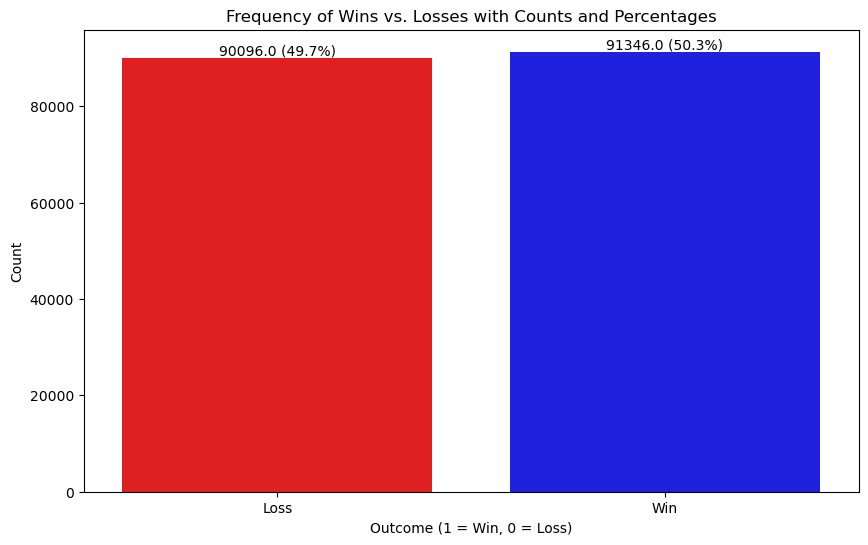

In [44]:
#Univariate chart of the target

# Calculate the total number of observations
total = len(df_combined)

# Create a bar plot to show the frequency of wins (1) vs. losses (0)
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Outcome', data=df_combined, palette={1: 'blue', 0: 'red'})

# Annotate each bar with the count and percentage
for p in ax.patches:
    count = p.get_height()  # Get the count for each bar
    percentage = 100 * count / total  # Calculate the percentage
    ax.annotate(f'{count} ({percentage:.1f}%)', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')  # Annotate the bar

# Customize the plot
plt.title('Frequency of Wins vs. Losses with Counts and Percentages')
plt.xlabel('Outcome (1 = Win, 0 = Loss)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Loss', 'Win'])

# Show the plot
plt.show()

In [14]:
##Create a Correlation Matrix
    ##A heatmap of the correlation matrix can help you 
    ##see the relationships between different variables in your dataset.

Correlation Matrix:
                  Games Played  Passing Yards  Rushing Yards  Receiving Yards  \
Games Played              NaN            NaN            NaN              NaN   
Passing Yards             NaN       1.000000       0.054173              NaN   
Rushing Yards             NaN       0.054173       1.000000        -0.053842   
Receiving Yards           NaN            NaN      -0.053842         1.000000   
Outcome                   NaN       0.069071       0.100673         0.025521   
wins                      NaN       0.068439       0.100238         0.025380   
losses                    NaN      -0.069575      -0.100851        -0.025608   
Win-Loss Pct              NaN       0.069071       0.100673         0.025521   

                  Outcome      wins    losses  Win-Loss Pct  
Games Played          NaN       NaN       NaN           NaN  
Passing Yards    0.069071  0.068439 -0.069575      0.069071  
Rushing Yards    0.100673  0.100238 -0.100851      0.100673  
Receiving 

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


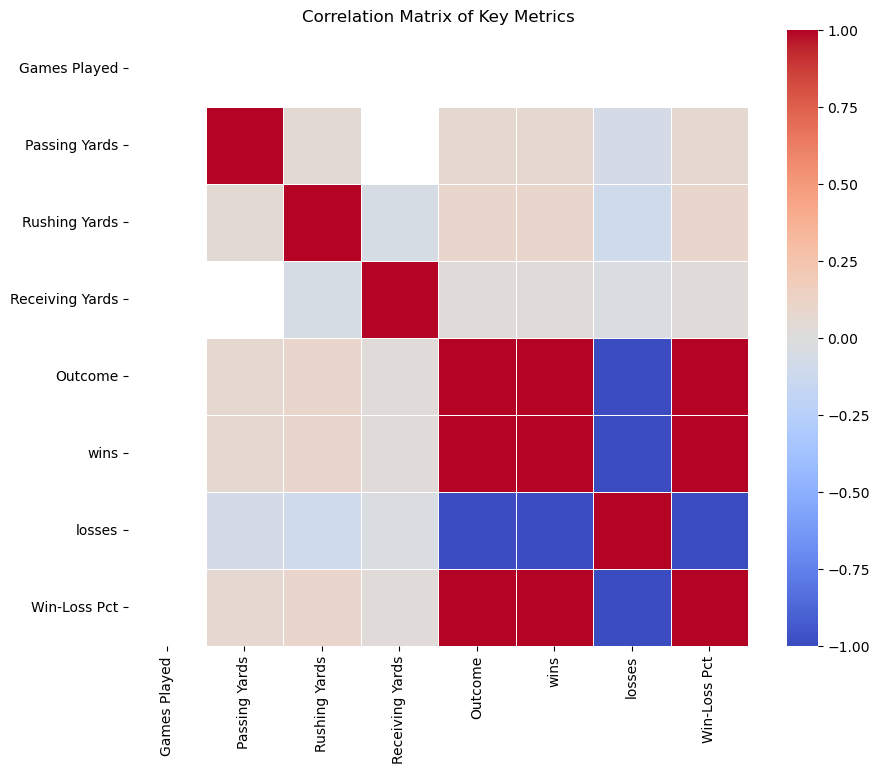

In [15]:
# Correlation matrix
corr_matrix = df_combined.corr()
print("Correlation Matrix:\n", corr_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Key Metrics')
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27083
           1       1.00      1.00      1.00     27350

    accuracy                           1.00     54433
   macro avg       1.00      1.00      1.00     54433
weighted avg       1.00      1.00      1.00     54433

Confusion Matrix:
[[27083     0]
 [    0 27350]]
Accuracy Score: 1.0


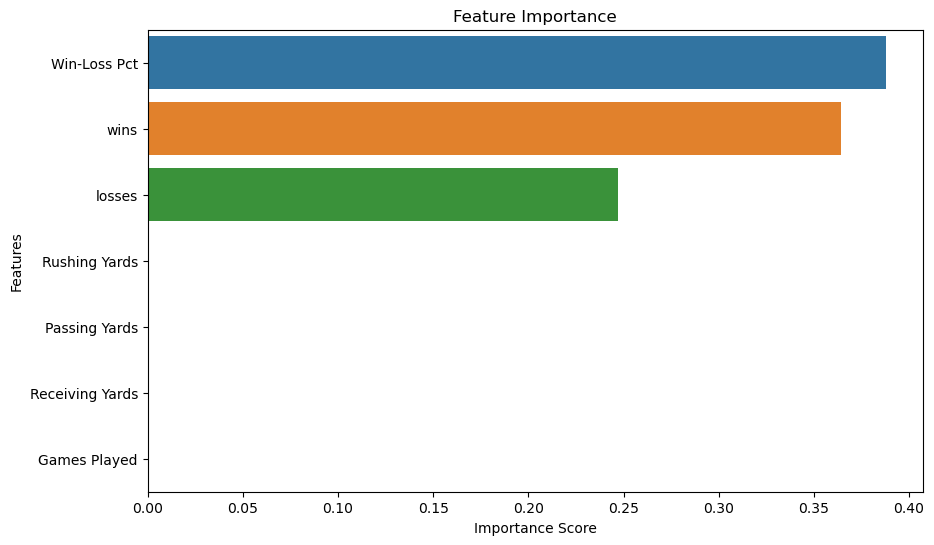

In [42]:
#Creating a Random Forest Classifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer

# 'Outcome' is the target variable

# Separate the features (X) from the target (y)
X = df_combined.drop(['Outcome'], axis=1)  # Drop the target column
y = df_combined['Outcome']  # Target variable

#Impute Missing Values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

#Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Train the Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

#Evaluate the Model
y_pred = rf_model.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the accuracy score
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Step 5: Visualize Feature Importance
feature_importances = pd.Series(rf_model.feature_importances_, index=df_combined.columns.drop(['Outcome']))
feature_importances = feature_importances.sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


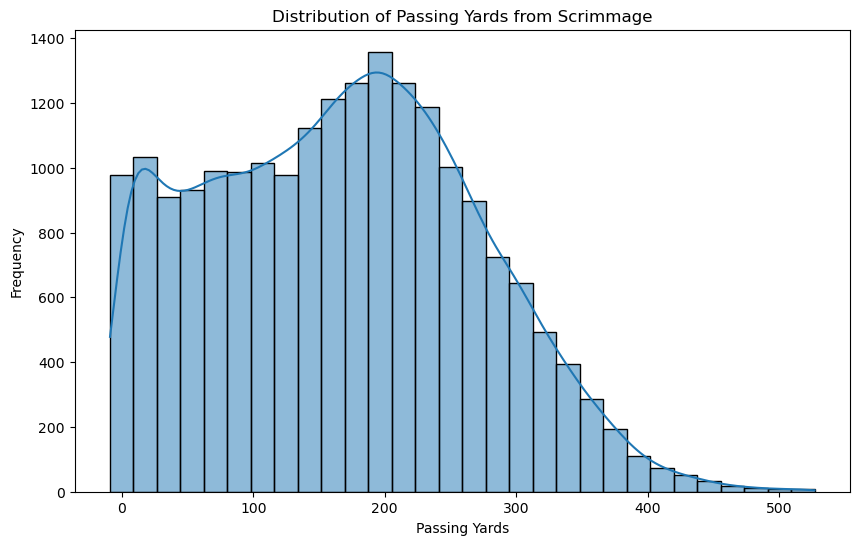

In [16]:
# Distribution of passing yards
plt.figure(figsize=(10, 6))
sns.histplot(df_combined['Passing Yards'], bins=30, kde=True)
plt.title('Distribution of Passing Yards from Scrimmage')
plt.xlabel('Passing Yards')
plt.ylabel('Frequency')
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


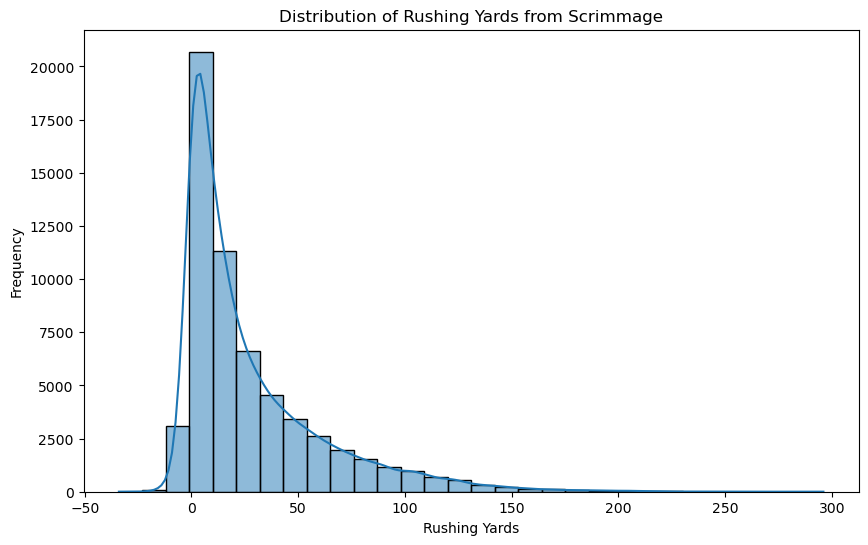

In [17]:
# Distribution of rushing yards
plt.figure(figsize=(10, 6))
sns.histplot(df_combined['Rushing Yards'], bins=30, kde=True)
plt.title('Distribution of Rushing Yards from Scrimmage')
plt.xlabel('Rushing Yards')
plt.ylabel('Frequency')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


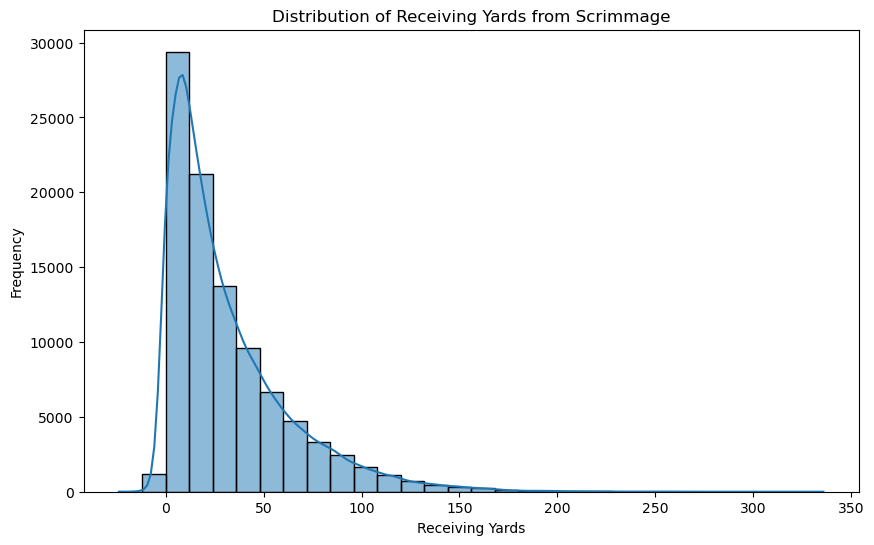

In [18]:
# Distribution of receiving yards
plt.figure(figsize=(10, 6))
sns.histplot(df_combined['Receiving Yards'], bins=30, kde=True)
plt.title('Distribution of Receiving Yards from Scrimmage')
plt.xlabel('Receiving Yards')
plt.ylabel('Frequency')
plt.show()

In [19]:
####Create Box Plots for Passing, Rushing, and Receiving Yards
    ##A box plot (or box-and-whisker plot) provides a graphical summary of the
    ##distribution of a dataset. It displays the median, quartiles, and potential 
    ##outliers, giving a clear picture of the data's central tendency and variability.

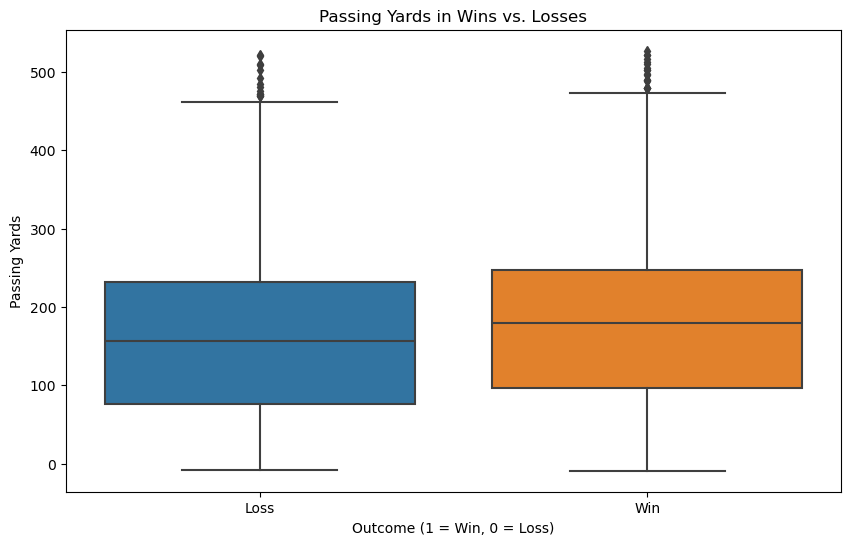

In [20]:
#Passing Yards impact on Wins and Losses

# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Create a box plot comparing Passing Yards in Wins vs. Losses
sns.boxplot(x='Outcome', y='Passing Yards', data=df_combined)

# Customize the plot
plt.title('Passing Yards in Wins vs. Losses')
plt.xlabel('Outcome (1 = Win, 0 = Loss)')
plt.ylabel('Passing Yards')
plt.xticks([0, 1], ['Loss', 'Win'])

# Show the plot
plt.show()


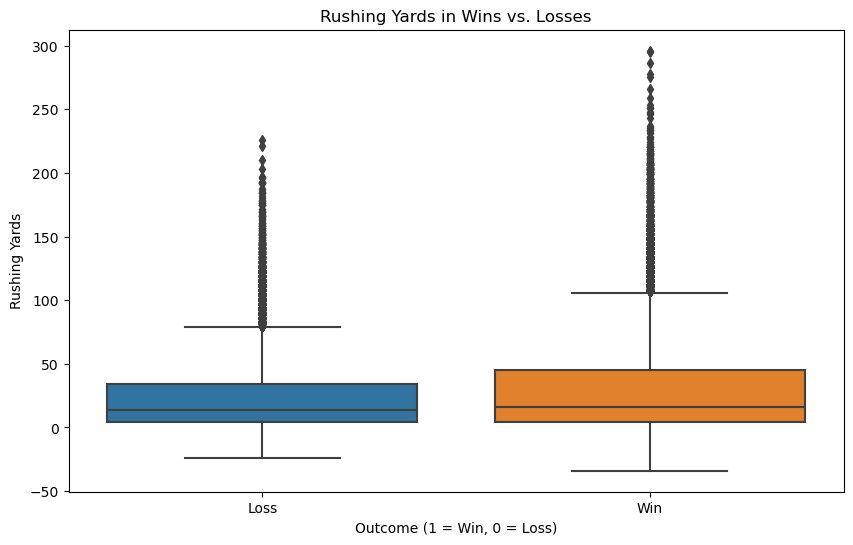

In [21]:
#Rushing Yards impact on Wins and Losses

# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Create a box plot comparing Rushing Yards in Wins vs. Losses
sns.boxplot(x='Outcome', y='Rushing Yards', data=df_combined)

# Customize the plot
plt.title('Rushing Yards in Wins vs. Losses')
plt.xlabel('Outcome (1 = Win, 0 = Loss)')
plt.ylabel('Rushing Yards')
plt.xticks([0, 1], ['Loss', 'Win'])

# Show the plot
plt.show()


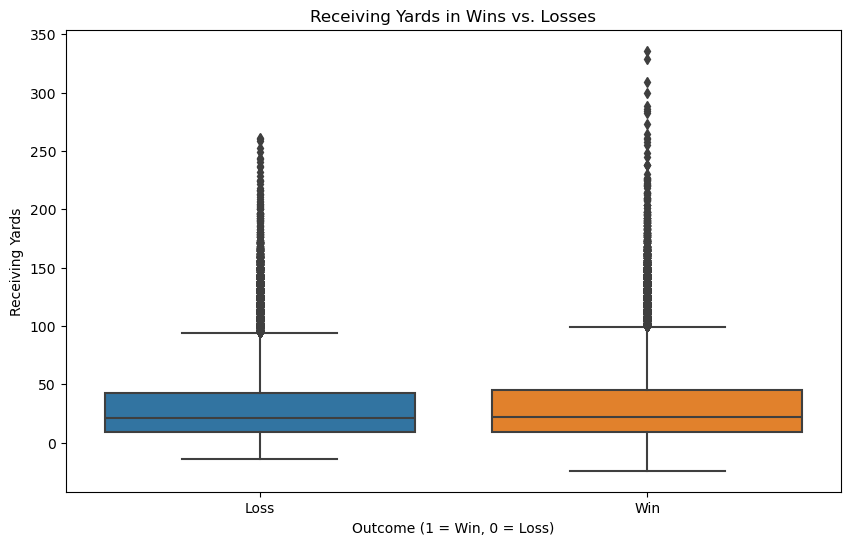

In [22]:
#Receiving Yards impact on Wins and Losses

# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Create a box plot comparing Receiving Yards in Wins vs. Losses
sns.boxplot(x='Outcome', y='Receiving Yards', data=df_combined)

# Customize the plot
plt.title('Receiving Yards in Wins vs. Losses')
plt.xlabel('Outcome (1 = Win, 0 = Loss)')
plt.ylabel('Receiving Yards')
plt.xticks([0, 1], ['Loss', 'Win'])

# Show the plot
plt.show()


In [23]:
###Create Violinplots for Passing, Rushing, and Receiving Yards
    ##Similar to a box plot, a violin plot shows the distribution of the data. 
    ##It also adds a rotated KDE plot on each side to show the density of the data.

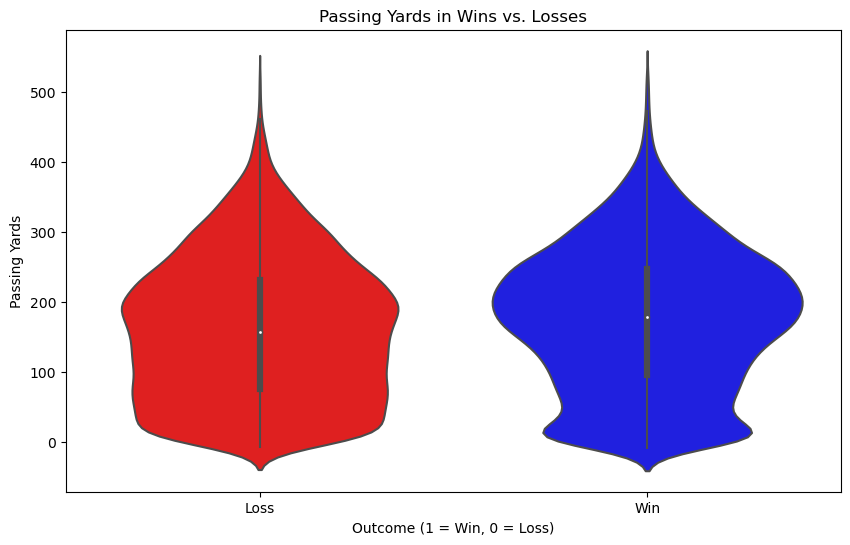

In [24]:
# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Create a violin plot comparing Passing Yards in Wins vs. Losses
sns.violinplot(x='Outcome', y='Passing Yards', data=df_combined, palette={1: 'blue', 0: 'red'})

# Customize the plot
plt.title('Passing Yards in Wins vs. Losses')
plt.xlabel('Outcome (1 = Win, 0 = Loss)')
plt.ylabel('Passing Yards')
plt.xticks([0, 1], ['Loss', 'Win'])

# Show the plot
plt.show()


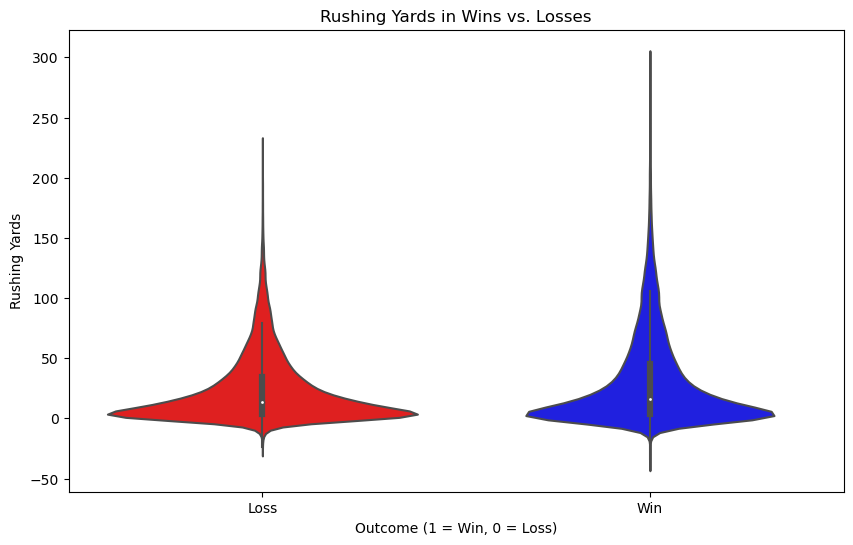

In [25]:
# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Create a violin plot comparing Rushing Yards in Wins vs. Losses
sns.violinplot(x='Outcome', y='Rushing Yards', data=df_combined, palette={1: 'blue', 0: 'red'})

# Customize the plot
plt.title('Rushing Yards in Wins vs. Losses')
plt.xlabel('Outcome (1 = Win, 0 = Loss)')
plt.ylabel('Rushing Yards')
plt.xticks([0, 1], ['Loss', 'Win'])

# Show the plot
plt.show()

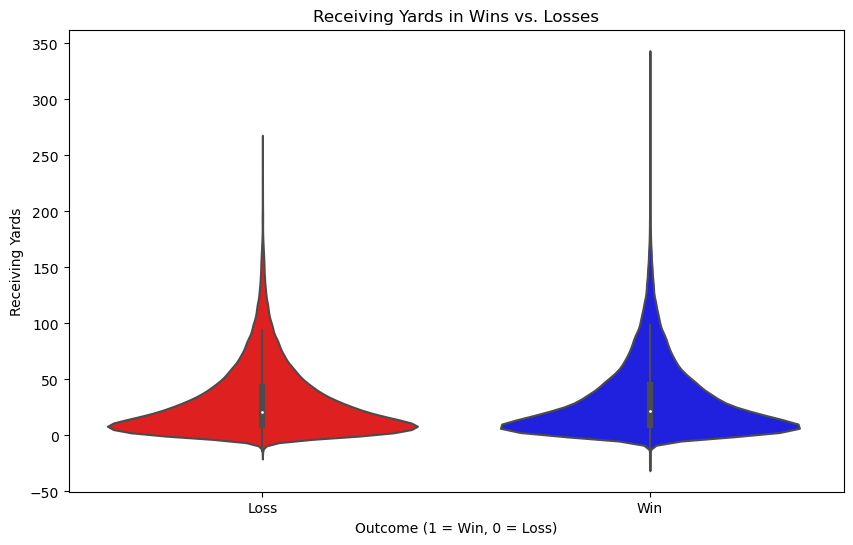

In [26]:
# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Create a violin plot comparing Receiving Yards in Wins vs. Losses
sns.violinplot(x='Outcome', y='Receiving Yards', data=df_combined, palette={1: 'blue', 0: 'red'})

# Customize the plot
plt.title('Receiving Yards in Wins vs. Losses')
plt.xlabel('Outcome (1 = Win, 0 = Loss)')
plt.ylabel('Receiving Yards')
plt.xticks([0, 1], ['Loss', 'Win'])

# Show the plot
plt.show()

In [27]:
###Create Strip Plots for Passing, Rushing, and Receiving Yards
    ##A strip plot is a type of plot that shows all individual data points 
    ##for a given variable, often categorized by another variable. It arranges 
    ##the data points in a line (or strip) along one axis, with some jitter added 
    ##to prevent overlapping points.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


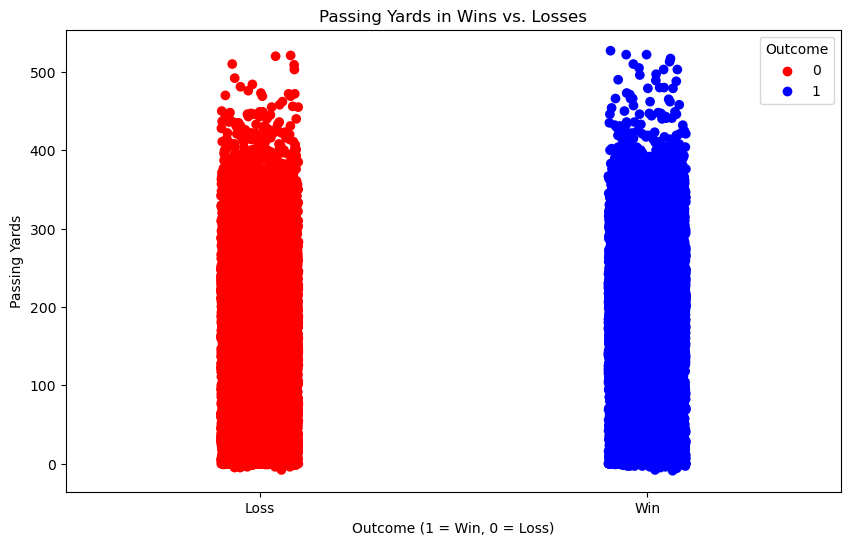

In [28]:
# Replace inf values with NaN
df_combined.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values in the Outcome column with 0
df_combined['Outcome'] = df_combined['Outcome'].fillna(0)

# Convert Outcome to integers
df_combined['Outcome'] = df_combined['Outcome'].astype(int)

# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Create a strip plot comparing Passing Yards in Wins vs. Losses
sns.stripplot(x='Outcome', y='Passing Yards', data=df_combined, hue='Outcome', palette={1: 'blue', 0: 'red'}, jitter=True, size=7)

# Customize the plot
plt.title('Passing Yards in Wins vs. Losses')
plt.xlabel('Outcome (1 = Win, 0 = Loss)')
plt.ylabel('Passing Yards')
plt.xticks([0, 1], ['Loss', 'Win'])

# Show the plot
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


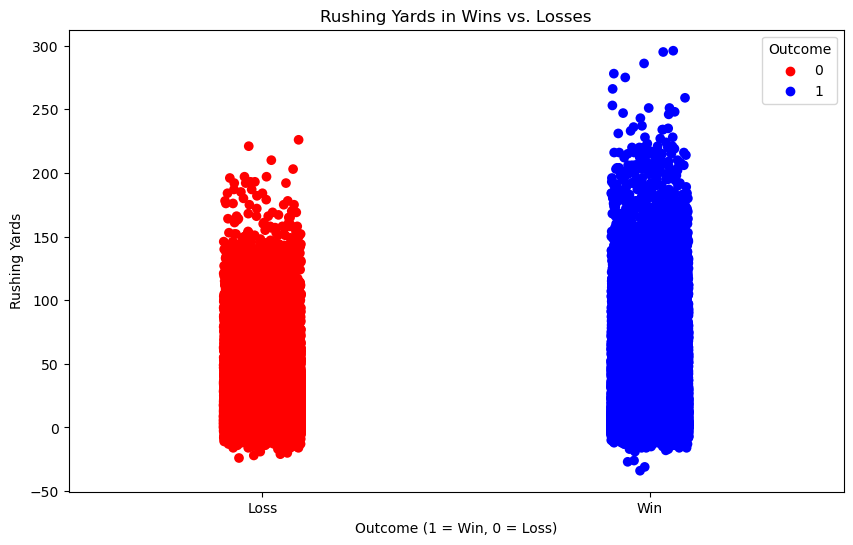

In [29]:
# Replace inf values with NaN
df_combined.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values in the Outcome column with 0
df_combined['Outcome'] = df_combined['Outcome'].fillna(0)

# Convert Outcome to integers
df_combined['Outcome'] = df_combined['Outcome'].astype(int)

# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Create a strip plot comparing Rushing Yards in Wins vs. Losses
sns.stripplot(x='Outcome', y='Rushing Yards', data=df_combined, hue='Outcome', palette={1: 'blue', 0: 'red'}, jitter=True, size=7)

# Customize the plot
plt.title('Rushing Yards in Wins vs. Losses')
plt.xlabel('Outcome (1 = Win, 0 = Loss)')
plt.ylabel('Rushing Yards')
plt.xticks([0, 1], ['Loss', 'Win'])

# Show the plot
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


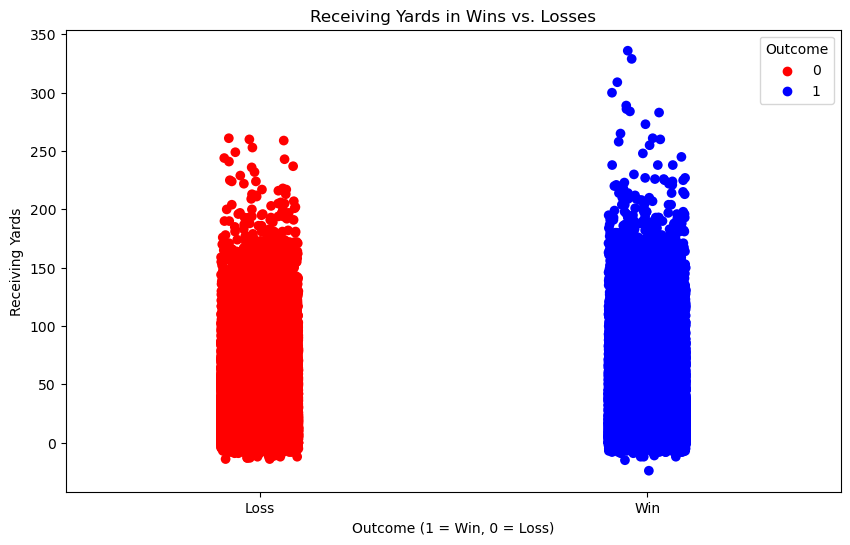

In [30]:
# Replace inf values with NaN
df_combined.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values in the Outcome column with 0
df_combined['Outcome'] = df_combined['Outcome'].fillna(0)

# Convert Outcome to integers
df_combined['Outcome'] = df_combined['Outcome'].astype(int)

# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Create a strip plot comparing Receiving Yards in Wins vs. Losses
sns.stripplot(x='Outcome', y='Receiving Yards', data=df_combined, hue='Outcome', palette={1: 'blue', 0: 'red'}, jitter=True, size=7)

# Customize the plot
plt.title('Receiving Yards in Wins vs. Losses')
plt.xlabel('Outcome (1 = Win, 0 = Loss)')
plt.ylabel('Receiving Yards')
plt.xticks([0, 1], ['Loss', 'Win'])

# Show the plot
plt.show()


In [31]:
####Create Histogram of Passing, Rushing, and Receiving Yards
    ##For understanding the distribution.  A histogram can show the 
    ##distribution of passing yards, helping you see how frequently certain 
    ##ranges of yards occur, and you can separate the data by wins and losses.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


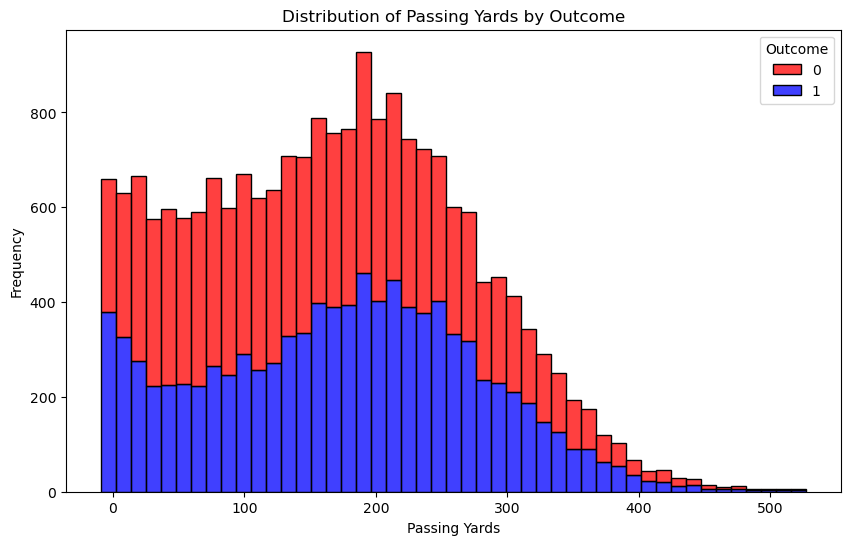

In [32]:
#Passing Yards
plt.figure(figsize=(10, 6))
sns.histplot(data=df_combined, x='Passing Yards', hue='Outcome', multiple='stack', palette={1: 'blue', 0: 'red'})
plt.title('Distribution of Passing Yards by Outcome')
plt.xlabel('Passing Yards')
plt.ylabel('Frequency')
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


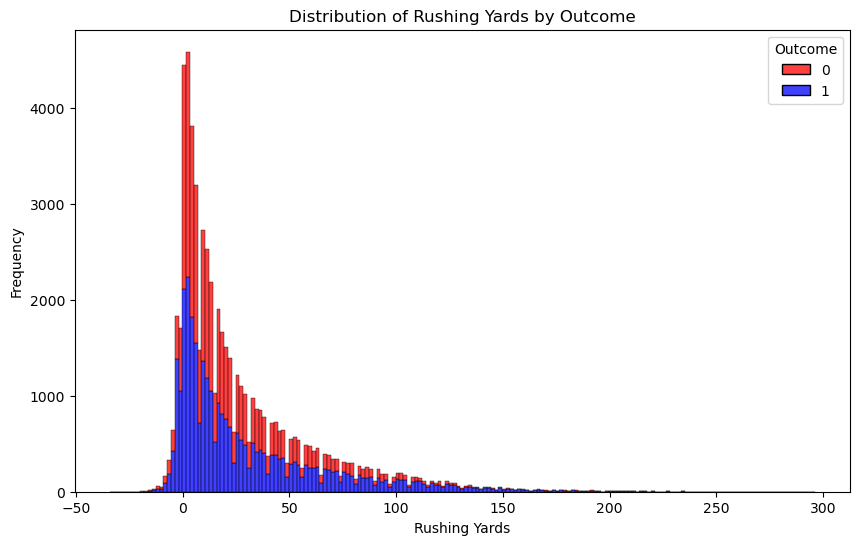

In [33]:
#Rushing Yards
plt.figure(figsize=(10, 6))
sns.histplot(data=df_combined, x='Rushing Yards', hue='Outcome', multiple='stack', palette={1: 'blue', 0: 'red'})
plt.title('Distribution of Rushing Yards by Outcome')
plt.xlabel('Rushing Yards')
plt.ylabel('Frequency')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


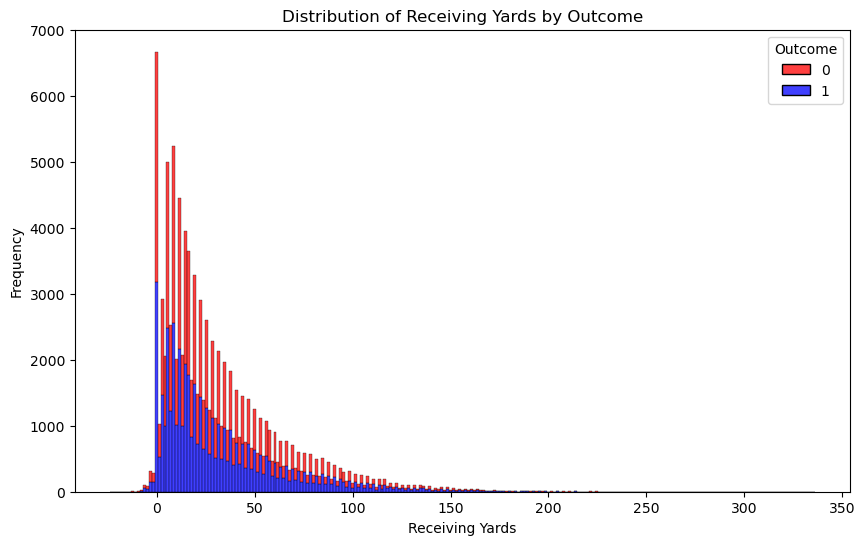

In [34]:
#Receiving Yards
plt.figure(figsize=(10, 6))
sns.histplot(data=df_combined, x='Receiving Yards', hue='Outcome', multiple='stack', palette={1: 'blue', 0: 'red'})
plt.title('Distribution of Receiving Yards by Outcome')
plt.xlabel('Receiving Yards')
plt.ylabel('Frequency')
plt.show()

In [35]:
###Create Kernel Density Plots for Passing, Rushing, and Receiving Yards
    ##For understanding the distribution of passing yards.  
    ##KDE plots are useful for visualizing the probability density function of 
    ##the passing yards. You can compare the distribution of passing yards for wins and losses.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


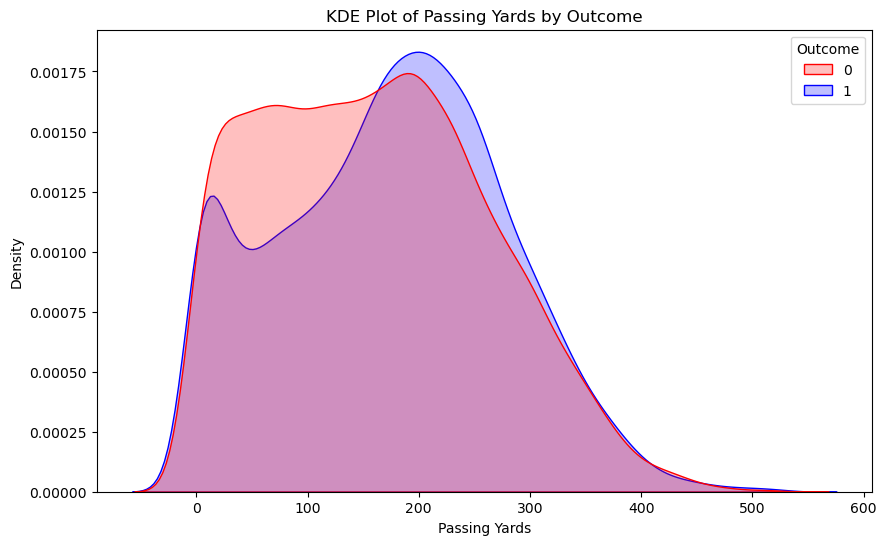

In [36]:
# KDE for Passing Yards
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_combined, x='Passing Yards', hue='Outcome', fill=True, palette={1: 'blue', 0: 'red'})
plt.title('KDE Plot of Passing Yards by Outcome')
plt.xlabel('Passing Yards')
plt.ylabel('Density')
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


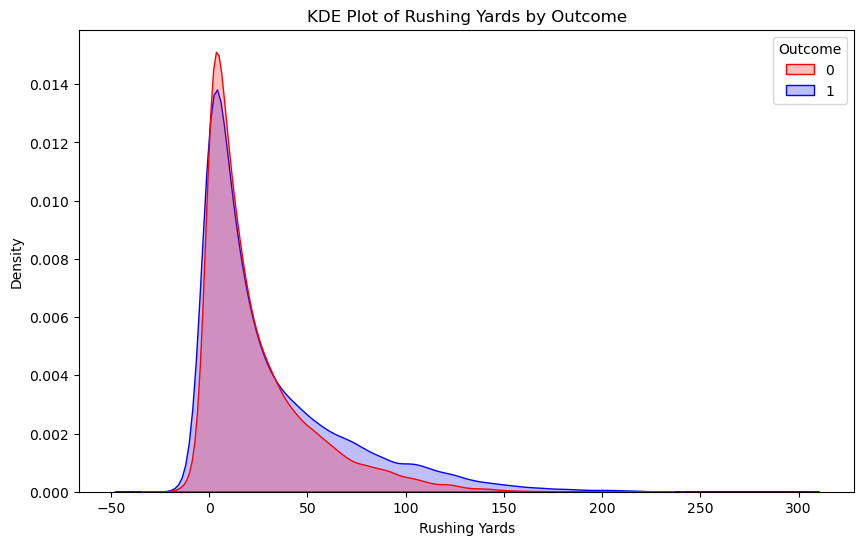

In [37]:
# KDE for Rushing Yards
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_combined, x='Rushing Yards', hue='Outcome', fill=True, palette={1: 'blue', 0: 'red'})
plt.title('KDE Plot of Rushing Yards by Outcome')
plt.xlabel('Rushing Yards')
plt.ylabel('Density')
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


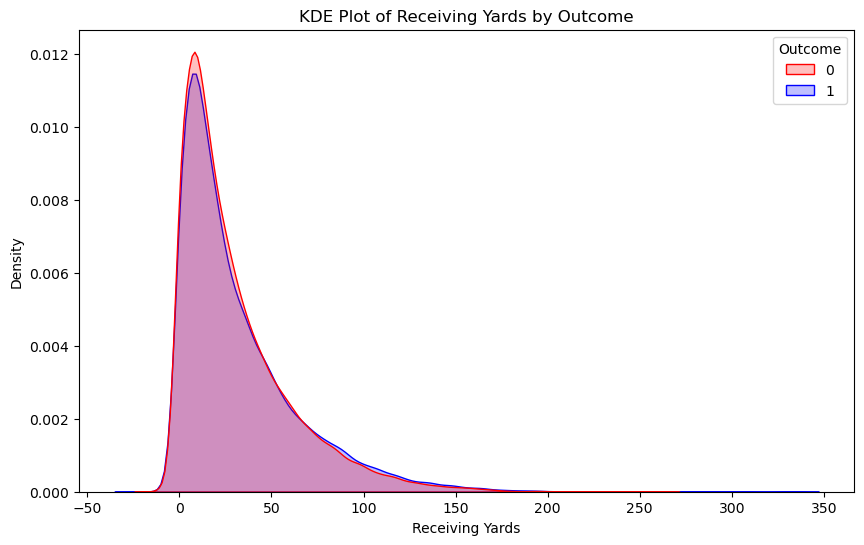

In [38]:
# KDE for Receiving Yards
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_combined, x='Receiving Yards', hue='Outcome', fill=True, palette={1: 'blue', 0: 'red'})
plt.title('KDE Plot of Receiving Yards by Outcome')
plt.xlabel('Receiving Yards')
plt.ylabel('Density')
plt.show()
